**Voici le travail final de notre binôme pour le premier module du cours:**

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

Après avoir importé toutes les librairies nécessaires au programme, nous définissons les constantes et les conditions initiales.

In [3]:
g = 9.81
v_e = 325
C_D = 0.15
m_s = 50.
m_po = 100
A = 0.7854
rho = 1.091
ho = 0.
v0=0.                         
dt = 0.1                         
N =400                   


Nous définissons la fonction m(t) correspondant à la masse totale du rocket en fonction du temps <br />  m(t)=m_p(t) + m_s <br />  m_p la masse de combustible <br />  m_s la masse de la cabine

In [4]:
def  m(t):
    if t<5.0:
        m=(m_s+m_po)-20*t   
    else:
        m=50.0
    return m

Nous définissons la fonction dm(t) qui correspond à la dérivée de la masse m_p(t)

In [5]:
def dm(t):
    if t<5.0:
        return 20.0
    else:
        return 0.0

Définissons maintenant les équations du mouvements dans la fonction f(u,t)
 <br />  u est un tableau rassemblant, dans la première colonne, les valeurs des vitesses au cours du temps et dans la deuxième colonne, les altitudes associées <br />  f nous permet d'obtenir les valeurs de dv/dt et de v=dh/dt telles que <br />  
u´= f(u,t)

In [6]:
def f(u,t):
    v=u[0]
    h=u[1]
    return [-g+(dm(t)*v_e/m(t))-1/(2.0*m(t))*rho*v*abs(v)*A*C_D,v]

Nous implémentons la méthode d'Euler pour calculer l'évolution temporelle de nos fonctions

In [7]:
def euler_step(u,dt,t): 
    k0=u[0]+dt*f(u,t)[0]
    k1=u[1]+dt*f(u,t)[1]
    return [k0,k1]

Nous définissons ensuite un tableau vide u de N lignes et 2 colonnes <br />  t est un tableau donnant des valeurs régulièrement espacées dans l'intervalle [0.0,N]  <br />  N est donné dans les conditions initiales au début <br />  u[0] correspond au couple initial (au temps t=0) (vitesse,altitude) <br />  On utilise la méthode d'Euler définit précédemment pour compléter le tableau u en fonction de toutes les valeurs de t

In [8]:
u = numpy.empty((N,2))
t=numpy.arange(0.0,N,0.1)
u[0] = numpy.array([v0,ho])
for n in range(0,N-1): 
    u[n+1] = euler_step(u[n],dt,t[n])
   

Après avoir observé les résultats de notre tableau de valeurs, nous choisissons un intervalle suffisament grand pour observer toute la trajectoire de la rocket jusqu'à sa retombée au sol sur deux graphiques:
    - l'altitude en fonction du temps
    - l'altitude en fonction de la vitesse

In [9]:
v=u[:,0]
h=u[:,1]
h1=h[0:N]
v1=v[0:N]
t1=t[0:N]

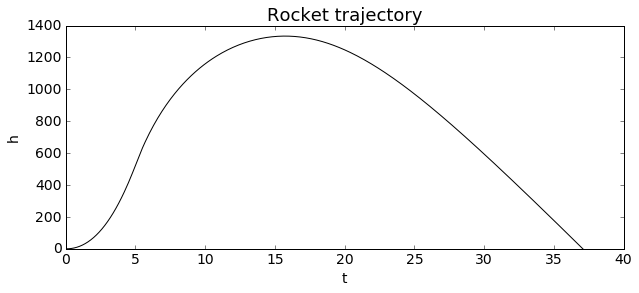

In [10]:
pyplot.figure(figsize=(10,4))   
pyplot.ylim(0.0,1400.0)             
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.xlabel('t', fontsize=14) 
pyplot.ylabel('h', fontsize=14) 
pyplot.title('Rocket trajectory',fontsize=18)
pyplot.plot(t1,h1,'k-');

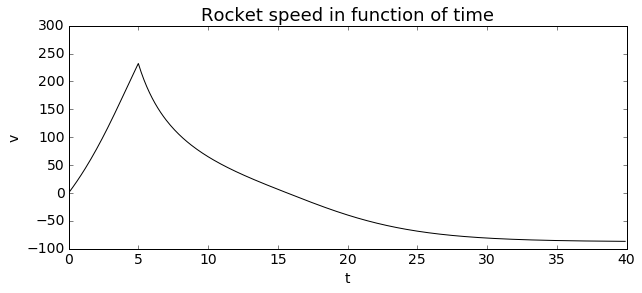

In [11]:
pyplot.figure(figsize=(10,4))   
pyplot.ylim(-100.0,300.0)             
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.xlabel('t', fontsize=14) 
pyplot.ylabel('v', fontsize=14) 
pyplot.title('Rocket speed in function of time', fontsize=18)
pyplot.plot(t1,v1,'k-');

At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket? **82.0 kg** <br />  What is the maximum speed of the rocket in $\frac{m}{s}$? **2.32106012e+02$\frac{m}{s}$** At what time does this occur (in seconds)? **5.0 s** What is the altitude at this time (in meters)? **523.522710591 m** <br />  What is the rocket's maximum altitude during flight (in meters)? **1333.82084723 m** At what time (in seconds) does this occur? **16 s**
<br />  At what time (in seconds) does the rocket impact the ground? **Between 37.0 s and 37.1 s** What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact? **Between -85.9758241821 $\frac{m}{s}$ and -86.0067454374 $\frac{m}{s}$**